In [178]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from custom_functions import get_resume, information_gain
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

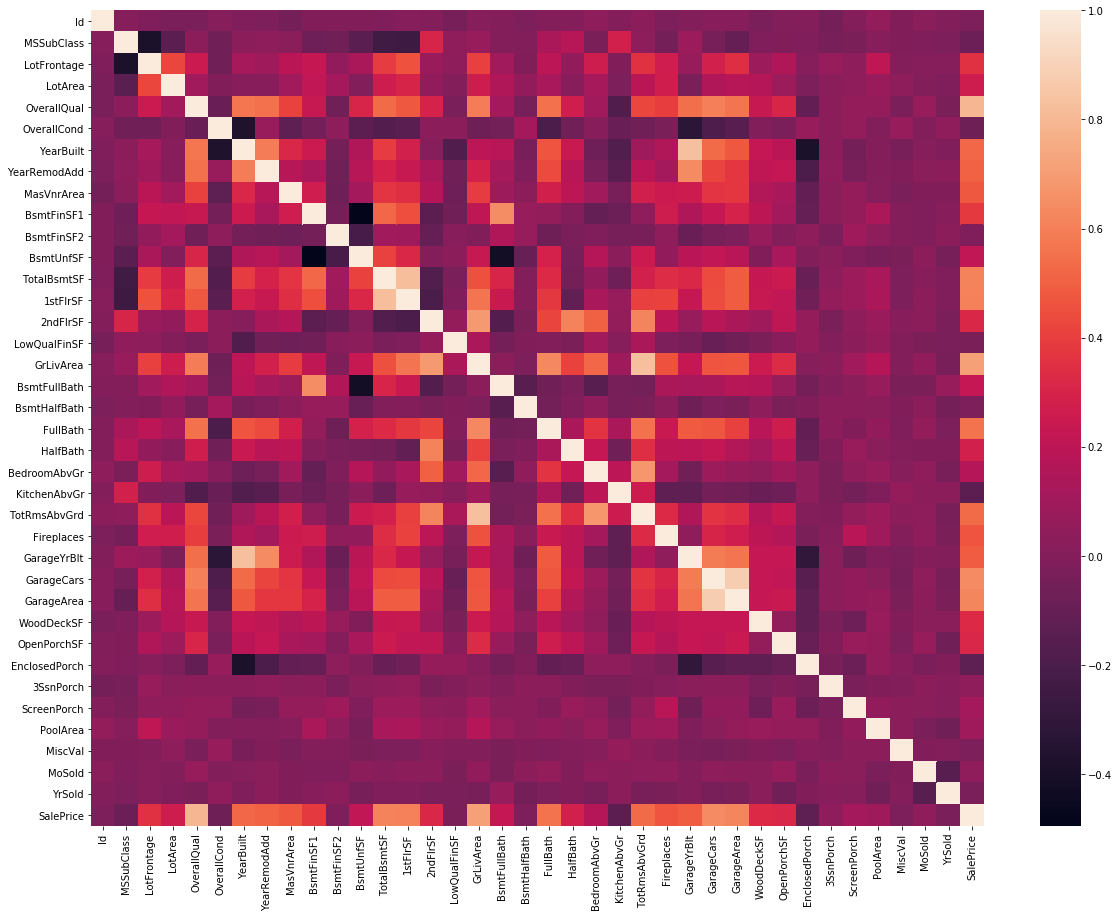

In [179]:
num_features_exploration = []
cat_features_exploration = []
for x in data.columns:
    if pd.api.types.is_object_dtype(data[x].dtype):
        cat_features_exploration.append(x)
    elif pd.api.types.is_numeric_dtype(data[x].dtype):
        num_features_exploration.append(x)
data[num_features_exploration].corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data[num_features_exploration].corr(),ax=ax)

SalePrice
count    1460.000000
mean   180921.195890
std     79442.502883
min     34900.000000
25%    129975.000000
50%    163000.000000
75%    214000.000000
max    755000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5B3D0FF08>]],
      dtype=object)

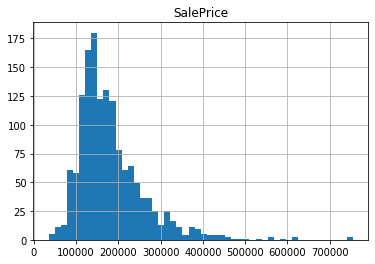

In [180]:
print(data[["SalePrice"]].describe())
data[["SalePrice"]].hist(bins=50)

In [196]:
# MSSubClass Analysis
feat = "MSSubClass"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)


Data completion: 1.0
Data test completion: 1.0
Data excepts: {150}
Information gain: 0.24


,count,mean,std,var,median,min,max
MSSubClass,,,,,,,
20,536,185224.811567,78782.189967,6.206633e+09,159250,35311,611657
30,69,95829.724638,24857.110083,6.178759e+08,99900,34900,163500
40,4,156125.000000,75747.799748,5.737729e+09,142500,79500,260000
45,12,108591.666667,20231.723889,4.093227e+08,107500,76000,139400
50,144,143302.972222,54851.983707,3.008740e+09,132000,37900,410000
60,299,239948.501672,86579.909966,7.496081e+09,215200,129000,755000
70,60,166772.416667,58206.545762,3.388002e+09,156000,40000,359100
75,16,192437.500000,100556.762577,1.011166e+10,163500,101000,475000
80,58,169736.551724,38197.808771,1.459073e+09,166500,107000,345000


In [182]:
data_test["MSSubClass"].value_counts()

20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64

En Test aparece la categoría MSSubClass 150, que no aparece en Train. Sería interesante hacer un K-neighbors o técnica similar para ver a qué categoría se parece más

In [195]:
# MSZoning
feat = "MSZoning"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)



Data completion: 1.0
Data test completion: 0.9972583961617546
Data excepts: {nan}
Information gain: 0.11


,count,mean,std,var,median,min,max
MSZoning,,,,,,,
C (all),10,74528.000000,33791.092031,1.141838e+09,74700,34900,133900
FV,65,214014.061538,52369.662067,2.742582e+09,205950,144152,370878
RH,16,131558.375000,35714.118435,1.275498e+09,136500,76000,200000
RL,1151,191004.994787,80766.341319,6.523202e+09,174000,39300,755000
RM,218,126316.830275,48521.689833,2.354354e+09,120500,37900,475000


Data completion: 0.8226027397260274
Data test completion: 0.8444139821795751


,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


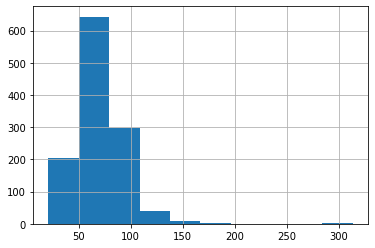

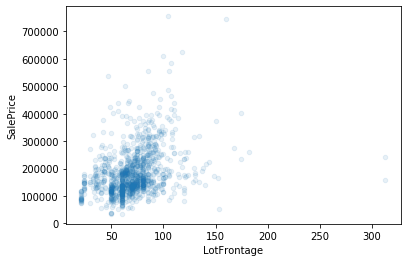

In [184]:
# LotFrontage
feat = "LotFrontage"
data[feat] = data[feat].fillna(data[feat].mode())
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
data[feat].hist()
data.plot(kind="scatter",x=feat, y="SalePrice",alpha=0.1)
data[[feat,"SalePrice"]].corr()

Data completion: 1.0
Data test completion: 1.0
            LotArea  SalePrice
LotArea    1.000000   0.263843
SalePrice  0.263843   1.000000


,LotAreaNorm,SalePrice
LotAreaNorm,1.000000,0.388528
SalePrice,0.388528,1.000000


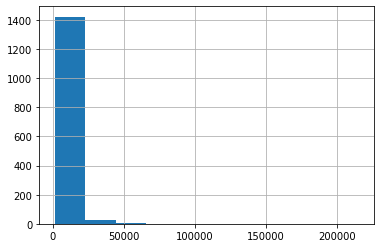

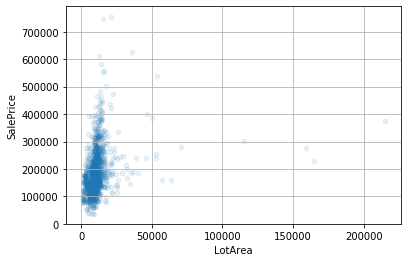

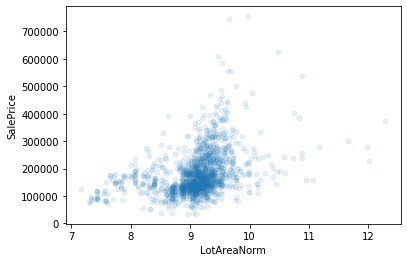

In [185]:
# LotArea
feat = "LotArea"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))

data[feat].hist()
data.plot(kind="scatter",x=feat, y="SalePrice",alpha=0.1)
print(data[[feat,"SalePrice"]].corr())

# Normalizamos
feat_norm = feat+"Norm"
data[feat_norm] = np.log(data.LotArea + 1)
data[feat_norm].hist()
data.plot(kind="scatter",x=feat_norm, y="SalePrice",alpha=0.1)
data[[feat_norm,"SalePrice"]].corr()

In [186]:
# Street
print("Information gain: {}".format(information_gain(data,"SalePrice","Street", norm=True)))
get_resume(data,"SalePrice","Street")

Information gain: 0.0


,count,mean,std,var,median,min,max
Street,,,,,,,
Grvl,6,130190.500000,65446.253991,4.283212e+09,114250,55993,228950
Pave,1454,181130.538514,79446.597317,6.311762e+09,163000,34900,755000


In [187]:
# Alley
feat = "Alley"
data[feat]=data[feat].fillna('Unk')
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Information gain: 0.02


,count,mean,std,var,median,min,max
Alley,,,,,,,
Grvl,50,122219.080000,34780.780734,1.209703e+09,119500,52500,256000
Pave,41,168000.585366,38370.375243,1.472286e+09,172500,40000,265979
Unk,1369,183452.131483,80667.145180,6.507188e+09,165000,34900,755000


In [188]:
# LotShape
feat = "LotShape"
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Information gain: 0.07


,count,mean,std,var,median,min,max
LotShape,,,,,,,
IR1,484,206101.665289,85858.489559,7.371680e+09,189000,52000,755000
IR2,41,239833.365854,99669.427362,9.933995e+09,221000,110000,538000
IR3,10,216036.500000,82540.334855,6.812907e+09,203570,73000,375000
Reg,925,164754.818378,69673.427215,4.854386e+09,146000,34900,582933


In [189]:
# LandContour
feat = "LandContour"
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Information gain: 0.02


,count,mean,std,var,median,min,max
LandContour,,,,,,,
Bnk,63,143104.079365,49361.244074,2.436532e+09,139400,52500,315000
HLS,50,231533.940000,101790.139741,1.036123e+10,222250,82500,538000
Low,36,203661.111111,83935.353620,7.045144e+09,190000,39300,385000
Lvl,1311,180183.746758,78463.567918,6.156531e+09,162900,34900,755000


In [190]:
# Utilities
feat = "Utilities"
print(data_test[feat].value_counts())
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

AllPub    1457
Name: Utilities, dtype: int64
Information gain: nan


,count,mean,std,var,median,min,max
Utilities,,,,,,,
AllPub,1459,180950.95682,79461.599814,6.314146e+09,163000,34900,755000
NoSeWa,1,137500.00000,NaN,NaN,137500,137500,137500


In [191]:
# LotConfig
feat = "LotConfig"
print(data_test[feat].value_counts())
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64
Information gain: 0.02


,count,mean,std,var,median,min,max
LotConfig,,,,,,,
Corner,263,181623.425856,84466.041222,7.134512e+09,160000.0,52500,755000
CulDSac,94,223854.617021,93117.546586,8.670877e+09,199262.0,84000,625000
FR2,47,177934.574468,62788.926829,3.942449e+09,165000.0,81000,394617
FR3,4,208475.000000,78379.222374,6.143302e+09,195450.0,128000,315000
Inside,1052,176938.047529,76426.805787,5.841057e+09,159697.5,34900,611657


In [192]:
# LandSlope
feat = "LandSlope"
print(data_test[feat].value_counts())
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)

Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64
Information gain: 0.0


,count,mean,std,var,median,min,max
LandSlope,,,,,,,
Gtl,1382,179956.799566,78669.369151,6.188870e+09,161875,34900,755000
Mod,65,196734.138462,92375.358116,8.533207e+09,186700,39300,538000
Sev,13,204379.230769,86729.922409,7.522079e+09,185000,61000,375000


In [193]:
# Neighborhood
feat = "Neighborhood"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)


Data completion: 1.0
Data test completion: 1.0
Data excepts: set()
Information gain: 0.54


,count,mean,std,var,median,min,max
Neighborhood,,,,,,,
Blmngtn,17,194870.882353,30393.229219,9.237484e+08,191000,159895,264561
Blueste,2,137500.000000,19091.883092,3.645000e+08,137500,124000,151000
BrDale,16,104493.750000,14330.176493,2.053540e+08,106000,83000,125000
BrkSide,58,124834.051724,40348.689270,1.628017e+09,124300,39300,223500
ClearCr,28,212565.428571,50231.538993,2.523208e+09,200250,130000,328000
CollgCr,150,197965.773333,51403.666438,2.642337e+09,197200,110000,424870
Crawfor,51,210624.725490,68866.395472,4.742580e+09,200624,90350,392500
Edwards,100,128219.700000,43208.616459,1.866985e+09,121750,58500,320000
Gilbert,79,192854.506329,35986.779085,1.295048e+09,181000,141000,377500


In [197]:
# Condition1
feat = "Condition1"
print("Data completion: {}".format(np.sum(data[feat].count()) / data.shape[0] ))
print("Data test completion: {}".format(np.sum(data_test[feat].count()) / data_test.shape[0]))
print("Data excepts: {}".format(set(data[feat].unique()).symmetric_difference(set(data_test[feat].unique())) ))
print("Information gain: {}".format(information_gain(data,"SalePrice",feat, norm=True)))
get_resume(data,"SalePrice",feat)


Data completion: 1.0
Data test completion: 1.0
Data excepts: set()
Information gain: 0.03


,count,mean,std,var,median,min,max
Condition1,,,,,,,
Artery,48,135091.666667,66226.660548,4.385971e+09,119550,66500,475000
Feedr,81,142475.481481,42157.290117,1.777237e+09,140000,40000,244600
Norm,1260,184495.492063,81256.980125,6.602697e+09,166500,34900,755000
PosA,8,225875.000000,52348.932313,2.740411e+09,212500,180000,335000
PosN,19,215184.210526,65256.536609,4.258416e+09,200000,109500,385000
RRAe,11,138400.000000,24030.813553,5.774800e+08,142500,87000,171000
RRAn,26,184396.615385,66177.922070,4.379517e+09,171495,79500,423000
RRNe,2,190750.000000,5303.300859,2.812500e+07,190750,187000,194500
RRNn,5,212400.000000,93823.238060,8.802800e+09,214000,110000,320000
